In [1]:
!pip install --upgrade feature-engine


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
!pip install scikit-learn==1.0.2

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
feature-engine 1.8.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.


In [40]:
import pandas as pd
import feature_engine
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv("projeto2.csv")

In [5]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [6]:
X_treino.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,Unknown,S
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",female,28.0,1,0,2689,14.4583,Unknown,C


In [7]:
X_treino.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,Unknown,S
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",female,28.0,1,0,2689,14.4583,Unknown,C


## Codificação One-Hot utilizando a biblioteca scikit-learn

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe=OneHotEncoder(categories="auto",drop="first",sparse=False)

In [10]:
ohe.fit(X_treino[["Sex","Embarked"]])

OneHotEncoder(drop='first', sparse=False)

In [11]:
treino_onehot = ohe.transform(X_treino[["Sex","Embarked"]])
teste_onehot = ohe.transform(X_teste[["Sex","Embarked"]])

In [12]:
treino_onehot

array([[1., 0., 1.],
       [0., 0., 0.],
       [1., 0., 1.],
       ...,
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]])

## Fazendo a codificação One-Hot com a biblioteca feature-engine

In [13]:
from feature_engine.encoding import OneHotEncoder

In [14]:
ohe_fe = OneHotEncoder(top_categories=None,variables=["Sex","Embarked"],drop_last=True)

In [15]:
ohe_fe.fit(X_treino)

OneHotEncoder(drop_last=True, variables=['Sex', 'Embarked'])

In [16]:
treino_ohe_fe = ohe_fe.transform(X_treino)
teste_ohe_fe = ohe_fe.transform(X_teste)

In [17]:
treino_ohe_fe.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_S,Embarked_C
857,858,1,"Daly, Mr. Peter Denis",51.0,0,0,113055,26.5500,E17,1,1,0
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,0,0,1
386,387,3,"Goodwin, Master. Sidney Leonard",1.0,5,2,CA 2144,46.9000,Unknown,1,1,0
124,125,1,"White, Mr. Percival Wayland",54.0,0,1,35281,77.2875,D26,1,1,0
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",28.0,1,0,2689,14.4583,Unknown,0,0,1


In [18]:
teste_ohe_fe.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_S,Embarked_C
495,496,3,"Yousseff, Mr. Gerious",28.0,0,0,2627,14.4583,Unknown,1,0,1
648,649,3,"Willey, Mr. Edward",28.0,0,0,S.O./P.P. 751,7.5500,Unknown,1,1,0
278,279,3,"Rice, Master. Eric",7.0,4,1,382652,29.1250,Unknown,1,0,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",28.0,1,0,PC 17569,146.5208,B78,0,0,1
255,256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,0,2,2650,15.2458,Unknown,0,0,1


## Substituindo categorias por contagem ou frequência de observações

In [19]:
from feature_engine.encoding import CountFrequencyEncoder

In [20]:
contagem = CountFrequencyEncoder(encoding_method="count",variables=["Sex","Embarked"])

In [21]:
contagem.fit(X_treino)

CountFrequencyEncoder(variables=['Sex', 'Embarked'])

In [22]:
contagem.encoder_dict_

{'Sex': {'male': 408, 'female': 215},
 'Embarked': {'S': 459, 'C': 108, 'Q': 56}}

In [23]:
treino_contagem = contagem.transform(X_treino)
teste_contagem = contagem.transform(X_teste)

In [24]:
treino_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",408,51.0,0,0,113055,26.5500,E17,459
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",215,49.0,1,0,PC 17572,76.7292,D33,108
386,387,3,"Goodwin, Master. Sidney Leonard",408,1.0,5,2,CA 2144,46.9000,Unknown,459


In [25]:
teste_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,3,"Yousseff, Mr. Gerious",408,28.0,0,0,2627,14.4583,Unknown,108
648,649,3,"Willey, Mr. Edward",408,28.0,0,0,S.O./P.P. 751,7.5500,Unknown,459
278,279,3,"Rice, Master. Eric",408,7.0,4,1,382652,29.1250,Unknown,56


In [26]:
frequencia = CountFrequencyEncoder(encoding_method="frequency",variables=["Sex","Embarked"])

In [27]:
frequencia.fit(X_treino)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['Sex', 'Embarked'])

In [28]:
frequencia.encoder_dict_

{'Sex': {'male': 0.6548956661316212, 'female': 0.3451043338683788},
 'Embarked': {'S': 0.7367576243980738,
  'C': 0.17335473515248795,
  'Q': 0.0898876404494382}}

In [29]:
treino_frequencia = frequencia.transform(X_treino)
teste_frequencia = frequencia.transform(X_teste)

In [30]:
treino_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",408,51.0,0,0,113055,26.5500,E17,459
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",215,49.0,1,0,PC 17572,76.7292,D33,108
386,387,3,"Goodwin, Master. Sidney Leonard",408,1.0,5,2,CA 2144,46.9000,Unknown,459


In [31]:
teste_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,3,"Yousseff, Mr. Gerious",408,28.0,0,0,2627,14.4583,Unknown,108
648,649,3,"Willey, Mr. Edward",408,28.0,0,0,S.O./P.P. 751,7.5500,Unknown,459
278,279,3,"Rice, Master. Eric",408,7.0,4,1,382652,29.1250,Unknown,56


## Codificação com inteiros de maneira ordenada utilizando a biblioteca feature-engine

In [32]:
from feature_engine.encoding import OrdinalEncoder

In [33]:
ordinal = OrdinalEncoder(encoding_method="ordered", variables=["Sex","Embarked"])

In [34]:
ordinal.fit(X_treino, y_treino)

OrdinalEncoder(variables=['Sex', 'Embarked'])

In [35]:
ordinal.encoder_dict_

{'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'Q': 1, 'C': 2}}

In [36]:
treino_ordinal = ordinal.transform(X_treino)
teste_ordinal = ordinal.transform(X_teste)

In [37]:
treino_ordinal.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",0,51.0,0,0,113055,26.5500,E17,0
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,2
386,387,3,"Goodwin, Master. Sidney Leonard",0,1.0,5,2,CA 2144,46.9000,Unknown,0


In [38]:
teste_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,3,"Yousseff, Mr. Gerious",408,28.0,0,0,2627,14.4583,Unknown,108
648,649,3,"Willey, Mr. Edward",408,28.0,0,0,S.O./P.P. 751,7.5500,Unknown,459
278,279,3,"Rice, Master. Eric",408,7.0,4,1,382652,29.1250,Unknown,56


In [41]:
sex_treino = X_treino["Sex"]
embarked_treino = X_treino["Embarked"]

temp = pd.concat([sex_treino,embarked_treino, y_treino], axis=1)

In [43]:
 def grafico(dataframe,coluna1,coluna2):
  plt.figure(figsize=(12,7))
  dataframe.groupby(coluna1)[coluna2].mean().plot()
  texto = f"Relação entre a {coluna1} e a média do {coluna2}"
  plt.title(texto)
  plt.ylabel(coluna2)

In [44]:
sex_treino = X_treino["Sex"]
embarked_treino = X_treino["Embarked"]

temp = pd.concat([sex_treino,embarked_treino, y_treino], axis=1)

In [45]:
temp.head()

,Sex,Embarked,Survived
857,male,S,1
52,female,C,1
386,male,S,0
124,male,S,0
578,female,C,0


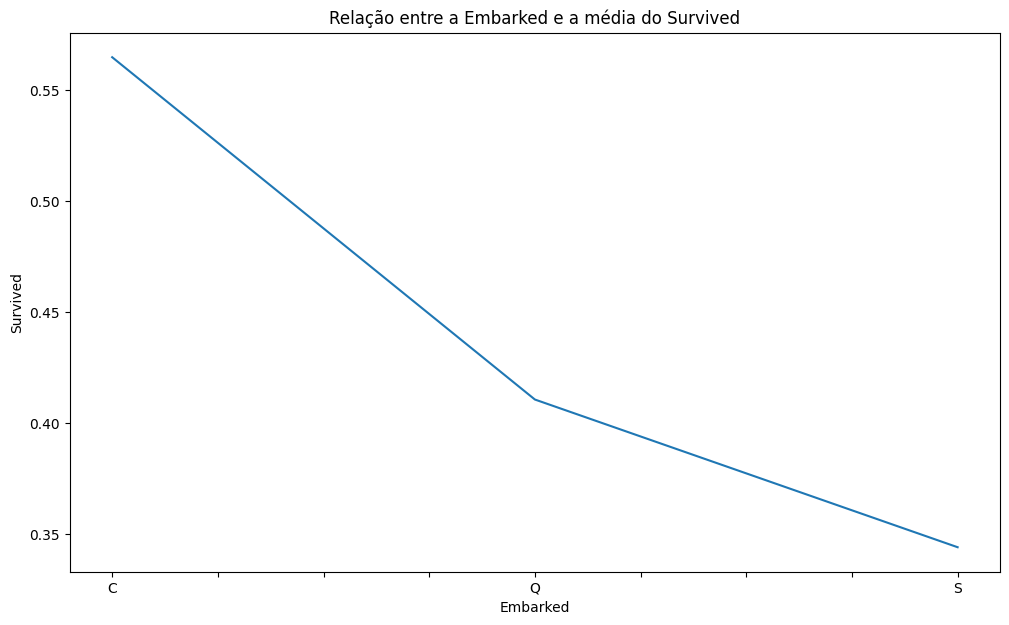

In [46]:
grafico(temp,"Embarked","Survived")

In [47]:
def concatena_e_plota(dataframe,alvo,coluna1,coluna2):
    aux1 = dataframe[coluna1]
    aux2 = alvo

    temp = pd.concat([aux1,aux2],axis=1)
    grafico(temp,coluna1,coluna2)

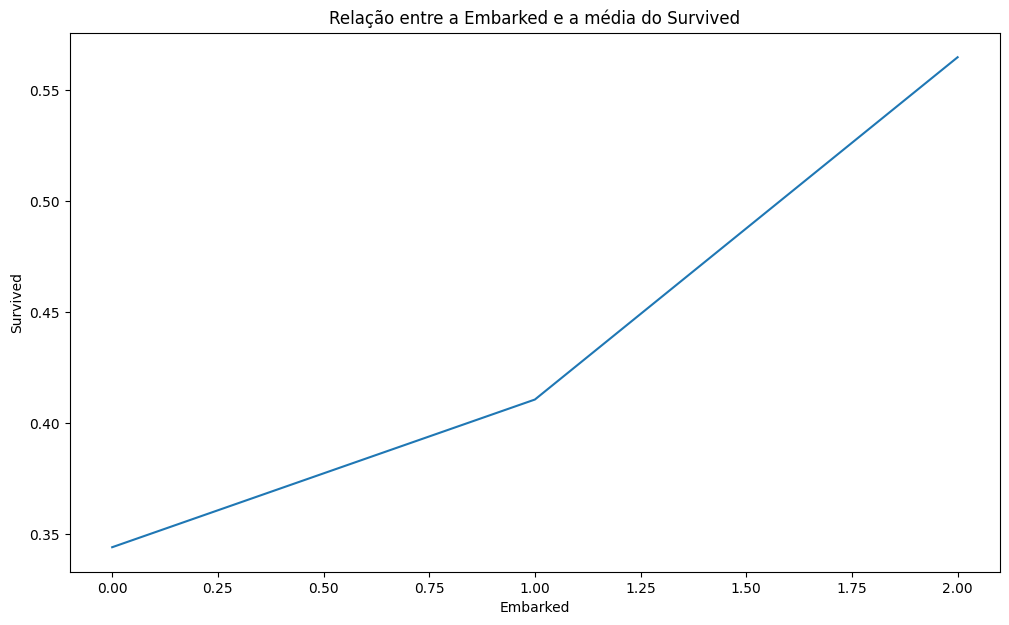

In [48]:
concatena_e_plota(treino_ordinal,y_treino,"Embarked","Survived")

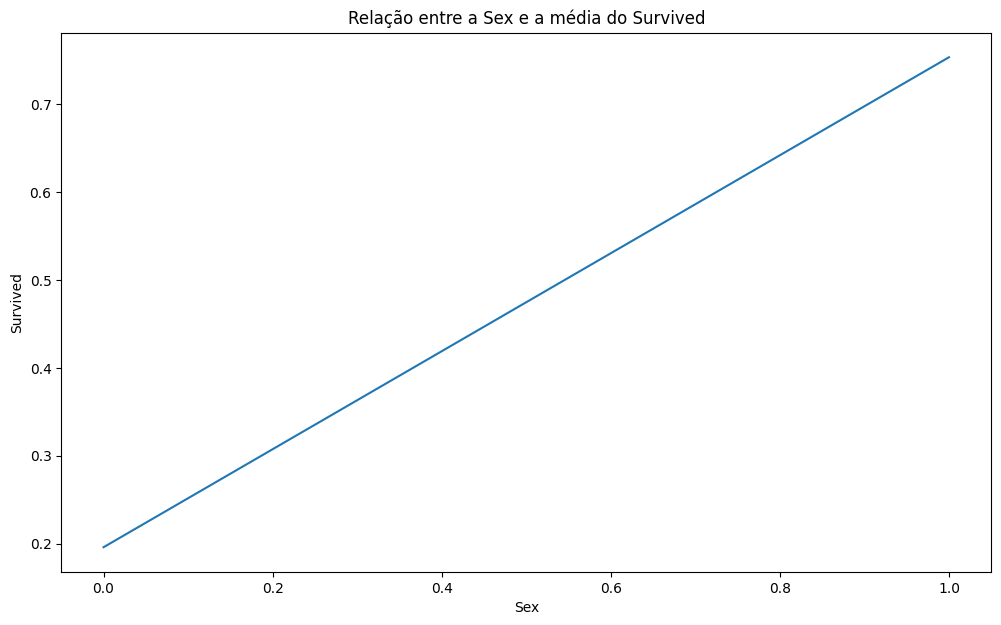

In [49]:
concatena_e_plota(treino_ordinal,y_treino,"Sex","Survived")